In [19]:
import numpy as np
import pandas as pd
from Bio import SeqIO

## Selected kmers comparison

In [6]:
fasta1 = SeqIO.parse(open("counts_original.fa"),'fasta')
total_counter1 = 0
counter1 = 0
for fasta in fasta1:
    name, sequence = int(fasta.id), str(fasta.seq)
    total_counter1 += name
    counter1 += 1
    
print("Unique kmers:", counter1)
print("Sum:", total_counter1)

Unique kmers: 185265
Sum: 149370236


In [7]:
fasta2 = SeqIO.parse(open("counts_selected.fa"),'fasta')
total_counter2 = 0
counter2 = 0
for fasta in fasta2:
    name, sequence = int(fasta.id), str(fasta.seq)
    total_counter2 += name
    counter2 += 1
    
print("Unique kmers:", counter2)
print("Sum:", total_counter2)

Unique kmers: 64248
Sum: 14928056


In [14]:
print("Percentage of Unique kmers selected:", counter2/counter1 *100)
print("Percentage of Total kmers selected : ", total_counter2/total_counter1 *100)

Percentage of Unique kmers selected: 34.67897336248077
Percentage of Total kmers selected :  9.99399639430174


# Time comparison

In [60]:
# dicti = {'all_kmers_time' : [9.41, 10.86, 12.41, 10.18, 11.95, 13.60], 
#          'sel_kmers_time' : [5.43, 50.56, 52.30, 6.23, 53.73, 48.79],
#          'MT_values' : ["11","12","14","21","22","24"]
#           }

dicti = {'kmers_time' : [9.41, 10.86, 12.41, 10.18, 11.95, 13.60, 5.43, 50.56, 52.30, 6.23, 53.73, 48.79],
         'type': ["all kmers", "all kmers", "all kmers", "all kmers", "all kmers", "all kmers", 
 "selected kmers", "selected kmers", "selected kmers", "selected kmers", "selected kmers", "selected kmers"],
         'MT_values' : ["11","12","14","21","22","24", "11","12","14","21","22","24"]
          }

df = pd.DataFrame(dicti)

df

,kmers_time,type,MT_values
0,9.41,all kmers,11
1,10.86,all kmers,12
2,12.41,all kmers,14
3,10.18,all kmers,21
4,11.95,all kmers,22
5,13.60,all kmers,24
6,5.43,selected kmers,11
7,50.56,selected kmers,12
8,52.30,selected kmers,14
9,6.23,selected kmers,21


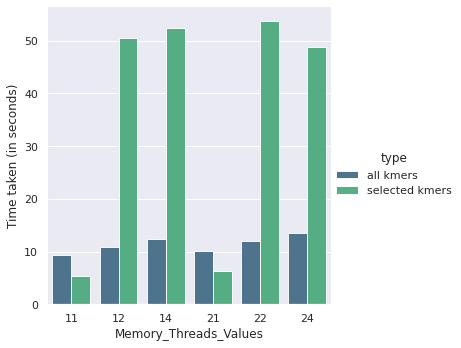

In [61]:
import seaborn as sns
g = sns.catplot(
    data=df, kind="bar",
    x="MT_values", y="kmers_time", hue="type",
    ci="sd", palette="viridis", alpha=.9, height=5
)
g.despine(left=True)
g.set_axis_labels("Memory_Threads_Values", "Time taken (in seconds)")